# Imports

In [109]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches

import sys  
sys.path.insert(0, '/home/HPC/camontan/turchetti_paper/')

from clustering_scripts import *

In [57]:
FIGDIR = '/home/HPC/camontan/turchetti_paper/img/paper_tier/'
DPI = 300
# FORMAT = 'png'
FORMAT = 'pdf'

In [8]:
# set latex rendering for plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Setup

In [66]:
OUTDIR = "/home/HPC/camontan/turchetti_paper/output/focused_scan/"

OUTDIR2 = "/home/HPC/camontan/turchetti_paper/output/focused_scan_2/"


"/home/HPC/camontan/turchetti_paper/output/focused_scan/scan_168_201_epsilon_32d0_mu_0d75_analysis_type_tune_default_tune.h5"

'/home/HPC/camontan/turchetti_paper/output/focused_scan/scan_168_201_epsilon_32d0_mu_0d75_analysis_type_tune_default_tune.h5'

In [3]:
TUNES = ["scan_28_31_", "scan_168_201_"]
EXTENTS = [(0, 0.45, 0, 0.45), (0, 0.6, 0, 0.6)]
EPSILONS = ["epsilon_0d0_", "epsilon_32d0_", "epsilon_64d0_"]
MUS = ["mu_0d0_", "mu_0d25_", "mu_0d5_", "mu_0d75_", "mu_1d0_"]

SAMPLES_PER_SIDE = [300]

In [4]:
tune = TUNES[1]
EXTENT = EXTENTS[1]
epsilon = EPSILONS[1]
mu = MUS[0]
samples = SAMPLES_PER_SIDE[0]

In [5]:
def get_hdf5_files(tune, epsilon, mu, samples):
    f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
    f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")
    f_rem = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_rem_rem.h5"), "r")
    f_tune = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tune_default_tune.h5"), "r")
    f_birkhoff = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

    return f_stab, f_lyap, f_rem, f_tune, f_birkhoff

# Figure 1 - some plot survival

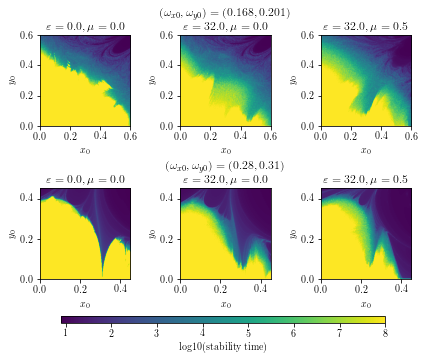

In [62]:
fig, axs = plt.subplots(2, 3, figsize=(6, 5))

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[0]
EXTENT = EXTENTS[0]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[1, 0].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1, 0].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[1, 0].set_xlabel("$x_0$")
axs[1, 0].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[1, 1].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1, 1].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.28, 0.31)$\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[1, 1].set_xlabel("$x_0$")
axs[1, 1].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[1, 2].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[1, 2].set_xlabel("$x_0$")
axs[1, 2].set_ylabel("$y_0$")

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]
axs[0, 0].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0, 0].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[0, 0].set_xlabel("$x_0$")
axs[0, 0].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]
axs[0, 1].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0, 1].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.168, 0.201)$\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[0, 1].set_xlabel("$x_0$")
axs[0, 1].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]
mappable = axs[0, 2].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[0, 2].set_xlabel("$x_0$")
axs[0, 2].set_ylabel("$y_0$")

# pre-adapt the figure to the colorbar
plt.tight_layout()

# make rows closer together
plt.subplots_adjust(hspace=0.001)

# create common colorbar at the bottom
cbar_ax = fig.add_axes([0.15, 0.04, 0.75, 0.02])
fig.colorbar(mappable, cax=cbar_ax, orientation="horizontal", label="log10(stability time)")

# save figure
plt.savefig(os.path.join(FIGDIR, f"stability.{FORMAT}"), bbox_inches="tight", dpi=DPI)

# Figure 2 - LE - FLI comparison

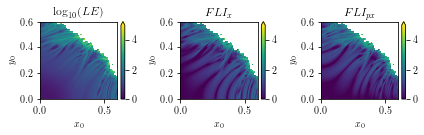

In [137]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(6, 3))
gs = gridspec.GridSpec(1, 3)
axs = [
    plt.subplot(gs[0]),
    plt.subplot(gs[1]),
    plt.subplot(gs[2]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[2]
mu = MUS[2]

f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

data_le = np.sqrt(f_lyap["100/lyapunov_error"][:])
data_fli_x = f_lyap["100/fli_base_x"][:]
data_fli_px = f_lyap["100/fli_base_px"][:]

map = axs[0].imshow(np.log10(data_le).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[0].set_title("$\\log_{{10}}(LE)$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(map, cax=cax, extend="max")

map = axs[1].imshow((data_fli_x).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[1].set_title("$FLI_{{x}}$")
axs[1].set_xlabel("$x_0$")
axs[1].set_ylabel("$y_0$")

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(map, cax=cax, extend="max")

map = axs[2].imshow((data_fli_px).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[2].set_title("$FLI_{{px}}$")
axs[2].set_xlabel("$x_0$")
axs[2].set_ylabel("$y_0$")

divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(map, cax=cax, extend="max")

# add space between subplots
plt.subplots_adjust(wspace=0.55)

plt.tight_layout()

# save figure
plt.savefig(os.path.join(FIGDIR, f"LE_FLI_low.{FORMAT}"), bbox_inches="tight", dpi=DPI)

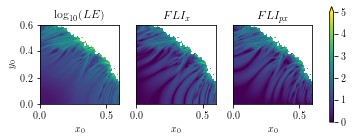

In [238]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(5, 2))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
axs = [
    plt.subplot(gs[0]),
    plt.subplot(gs[1], sharey=axs[0]),
    plt.subplot(gs[2], sharey=axs[0]),
    plt.subplot(gs[3]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[2]
mu = MUS[2]

f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

data_le = np.sqrt(f_lyap["100/lyapunov_error"][:])
data_fli_x = f_lyap["100/fli_base_x"][:]
data_fli_px = f_lyap["100/fli_base_px"][:]

map = axs[0].imshow(np.log10(data_le).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[0].set_title("$\\log_{{10}}(LE)$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

map = axs[1].imshow((data_fli_x).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[1].set_title("$FLI_{{x}}$")
axs[1].set_xlabel("$x_0$")
# remove y-axis labels
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylabel("")

map = axs[2].imshow((data_fli_px).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[2].set_title("$FLI_{{px}}$")
axs[2].set_xlabel("$x_0$")
# remove y-axis labels
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_ylabel("")

plt.colorbar(map, cax=axs[3], extend="max")

# add space between subplots
plt.subplots_adjust(wspace=0.55)

plt.tight_layout()

# save figure
plt.savefig(os.path.join(FIGDIR, f"LE_FLI_low.{FORMAT}"), bbox_inches="tight", dpi=DPI)

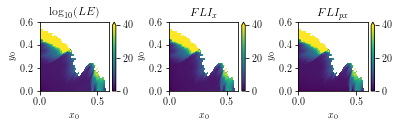

In [135]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(6, 3))
gs = gridspec.GridSpec(1, 3)
axs = [
    plt.subplot(gs[0]),
    plt.subplot(gs[1]),
    plt.subplot(gs[2]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[2]
mu = MUS[2]

f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

data_le = np.sqrt(f_lyap["10000/lyapunov_error"][:])
data_fli_x = f_lyap["10000/fli_base_x"][:]
data_fli_px = f_lyap["10000/fli_base_px"][:]

map = axs[0].imshow(np.log10(data_le).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[0].set_title("$\\log_{{10}}(LE)$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(map, cax=cax, extend="max")

map = axs[1].imshow((data_fli_x).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[1].set_title("$FLI_{{x}}$")
axs[1].set_xlabel("$x_0$")
axs[1].set_ylabel("$y_0$")

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(map, cax=cax, extend="max")

map = axs[2].imshow((data_fli_px).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[2].set_title("$FLI_{{px}}$")
axs[2].set_xlabel("$x_0$")
axs[2].set_ylabel("$y_0$")

divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(map, cax=cax, extend="max")

# add space between subplots
plt.subplots_adjust(wspace=0.7)

#plt.tight_layout()

# save figure
plt.savefig(os.path.join(FIGDIR, f"LE_FLI_high.{FORMAT}"), bbox_inches="tight", dpi=DPI)

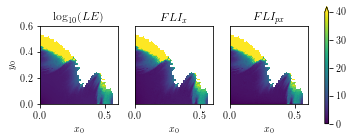

In [236]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(5, 2))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
axs = [
    plt.subplot(gs[0]),
    plt.subplot(gs[1], sharey=axs[0]),
    plt.subplot(gs[2], sharey=axs[0]),
    plt.subplot(gs[3]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[2]
mu = MUS[2]

f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

data_le = np.sqrt(f_lyap["10000/lyapunov_error"][:])
data_fli_x = f_lyap["10000/fli_base_x"][:]
data_fli_px = f_lyap["10000/fli_base_px"][:]

map = axs[0].imshow(np.log10(data_le).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[0].set_title("$\\log_{{10}}(LE)$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

map = axs[1].imshow((data_fli_x).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[1].set_title("$FLI_{{x}}$")
axs[1].set_xlabel("$x_0$")

# remove y-axis labels
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylabel("")

map = axs[2].imshow((data_fli_px).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[2].set_title("$FLI_{{px}}$")
axs[2].set_xlabel("$x_0$")

# remove y-axis labels
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_ylabel("")

plt.colorbar(map, cax=axs[3], extend="max")

# add space between subplots
plt.subplots_adjust(wspace=0.7)

plt.tight_layout()

# save figure
plt.savefig(os.path.join(FIGDIR, f"LE_FLI_high.{FORMAT}"), bbox_inches="tight", dpi=DPI)

In [72]:
f_lyap["1000"].keys()

<KeysViewHDF5 ['fli_base_px', 'fli_base_py', 'fli_base_x', 'fli_base_y', 'gali', 'lyapunov_error']>

# Figure 4-5: comparison lyapunov birkhoff 

In [212]:
f = h5py.File(f"/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5", 'r')
f_stab = h5py.File("/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_stability_stability.h5", "r")
f_lyap = h5py.File("/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_tangent_map_tangent_stuff.h5", "r")

In [213]:
data = f_stab["stability"][:]
mask = np.log10(data)==8

In [214]:
ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

gt_thesh = find_threshold(np.log10(ground_truth_data[mask]))
ground_truth = np.log10(ground_truth_data) > gt_thesh

In [215]:
times = []
lyapunov_data = []

for key in f.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    lyapunov_data.append(f[key]['lyapunov_x'][:])

# sort times and lyapunov data
times, lyapunov_data = zip(*sorted(zip(times, lyapunov_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_data = np.array(lyapunov_data)

In [216]:
lyapunov_thresholds = []
lyapunov_post_data = []
lyapunov_guesses = []
lyapunov_scores = []
for t, data in zip(times, lyapunov_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    lyapunov_post_data.append(data)
    lyapunov_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_thresholds[-1])
    lyapunov_guesses.append(guess)
    lyapunov_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_14483/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data 

In [217]:
times = []
lyapunov_b_data = []

for key in f.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    lyapunov_b_data.append(f[key]['lyapunov_b_x'][:])

# sort times and lyapunov_b data
times, lyapunov_b_data = zip(*sorted(zip(times, lyapunov_b_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_b_data = np.array(lyapunov_b_data)

In [218]:
lyapunov_b_thresholds = []
lyapunov_b_post_data = []
lyapunov_b_guesses = []
lyapunov_b_scores = []
for t, data in zip(times, lyapunov_b_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    lyapunov_b_post_data.append(data)
    lyapunov_b_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_b_thresholds[-1])
    lyapunov_b_guesses.append(guess)
    lyapunov_b_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_14483/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_14483/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/

-17.725433391388307 -2.0972086217638166
(50, 50)


/tmp/ipykernel_14483/2555289723.py:5: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


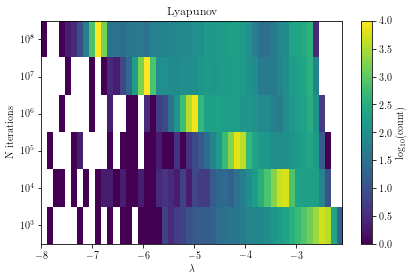

In [219]:
val_min, val_max = get_extents([l[mask] for l in lyapunov_post_data[14::7]], 10)
print(val_min, val_max)
val_min = -8
tmp_data, bin_centers = compose_count_map([l[mask] for l in lyapunov_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

plt.imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=4.0)

# for i, threshold in enumerate(lyapunov_thresholds[14::7]):
#     plt.plot([threshold, threshold], [i-0.475, i+0.48], color='r', linewidth=2)

# plt.xticks(rotation=45)
# set labels in y axis
plt.yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])
plt.xlabel("$\lambda$")
plt.ylabel("N iterations")
plt.colorbar(label="$\log_{10}(\mathrm{count})$")
plt.title("Lyapunov")
plt.tight_layout()

-17.735895734702694 -2.0609229340758577
(50, 50)


/tmp/ipykernel_14483/393427748.py:6: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


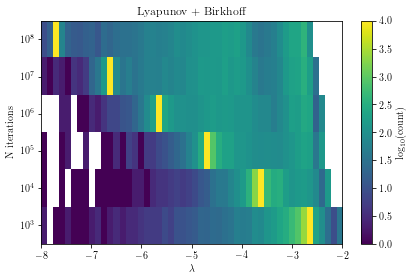

In [220]:
val_min, val_max = get_extents([l[mask] for l in lyapunov_b_post_data[14::7]], 10)
print(val_min, val_max)
val_min = -8
val_max = -2
tmp_data, bin_centers = compose_count_map([l[mask] for l in lyapunov_b_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

plt.imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=4.0)

vmax = np.max(tmp_data)

# for i, threshold in enumerate(lyapunov_thresholds[14::7]):
#     plt.plot([threshold, threshold], [i-0.475, i+0.48], color='r', linewidth=2)

# plt.xticks(rotation=45)
# set labels in y axis
plt.yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])
plt.xlabel("$\lambda$")
plt.ylabel("N iterations")
plt.colorbar(label="$\log_{10}(\mathrm{count})$")
plt.title("Lyapunov + Birkhoff")
plt.tight_layout()

-17.725433391388307 -2.0972086217638166
(50, 50)
-17.735895734702694 -2.0609229340758577
(50, 50)


/tmp/ipykernel_14483/2378840492.py:13: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)
/tmp/ipykernel_14483/2378840492.py:34: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


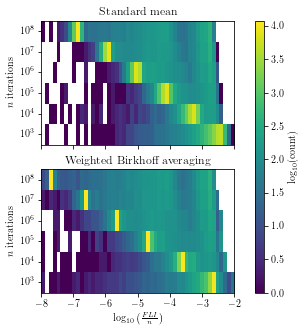

In [230]:
fig = plt.figure(figsize=(4, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05])
axs = [
    plt.subplot(gs[0,0]),
    plt.subplot(gs[1,0], sharex=axs[0]),
    plt.subplot(gs[:,1]),
]
val_min, val_max = get_extents([l[mask] for l in lyapunov_post_data[14::7]], 10)
print(val_min, val_max)
val_min = -8
val_max = -2
tmp_data, bin_centers = compose_count_map([l[mask] for l in lyapunov_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

map = axs[0].imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=vmax, interpolation='none')

# for i, threshold in enumerate(lyapunov_thresholds[14::7]):
#     plt.plot([threshold, threshold], [i-0.475, i+0.48], color='r', linewidth=2)

# plt.xticks(rotation=45)
# set labels in y axis
axs[0].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])

axs[0].set_ylabel("$n$ iterations")
axs[0].set_title("Standard mean")

val_min, val_max = get_extents([l[mask] for l in lyapunov_b_post_data[14::7]], 10)
print(val_min, val_max)
val_min = -8
val_max = -2
tmp_data, bin_centers = compose_count_map([l[mask] for l in lyapunov_b_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

axs[1].imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=vmax, interpolation='none')

axs[1].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])
axs[1].set_xlabel("$\\log_{{10}}\\left(\\frac{{FLI}}{{n}}\\right)$")

plt.colorbar(map, cax=axs[2], label="$\log_{10}(\mathrm{count})$")
axs[1].set_title("Weighted Birkhoff averaging")
axs[1].set_ylabel("$n$ iterations")

# remove xticks from top plot
plt.setp(axs[0].get_xticklabels(), visible=False)

plt.savefig(os.path.join(FIGDIR, f"lyapunov_birkhoff_map.{FORMAT}"), bbox_inches='tight', dpi=300)

/tmp/ipykernel_14483/3914834276.py:23: RuntimeWarning: invalid value encountered in log
  tmp_data = np.log(data_1[14:])
/tmp/ipykernel_14483/3914834276.py:29: RuntimeWarning: invalid value encountered in log
  tmp_data = np.log(data_2[14:])
/tmp/ipykernel_14483/3914834276.py:70: RuntimeWarning: invalid value encountered in log
  tmp_data = np.log(data_2[14:])


[-0.06923757 -6.30368054]
[ 1.36084350e-04 -7.43062152e+00]


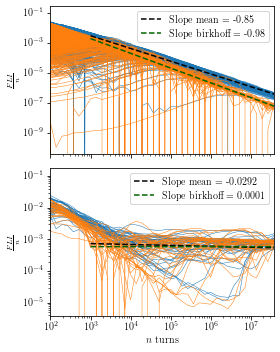

In [211]:
mask = np.logical_and(f['37275937']['lyapunov_b_x'][:] > 1e-8, f['37275937']['lyapunov_b_x'][:] < 1e-7)
time = []
data_1 = []
data_2 = []

for key in f:
    if not key.isdigit():
        continue
    time.append(int(key))
    data_1.append(f[key]['lyapunov_x'][mask][::10])
    data_2.append(f[key]['lyapunov_b_x'][mask][::10])

time = np.array(time)
data_1 = np.array(data_1)
data_2 = np.array(data_2)

sort_idx = np.argsort(time)
time = time[sort_idx]
data_1 = data_1[sort_idx]
data_2 = data_2[sort_idx]

# fit a line to the log log data
tmp_data = np.log(data_1[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn = np.poly1d(fit)

tmp_data = np.log(data_2[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit_2 = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn_2 = np.poly1d(fit_2)

fig, axs = plt.subplots(2, 1, figsize=(4, 5), sharex=True)

axs[0].plot(time, data_1, linewidth=0.5, c='C0')
axs[0].plot(time, data_2, linewidth=0.5, c='C1')
axs[0].plot(time[14:], np.exp(fit_fn(np.log(time[14:]))), "--", label='Slope mean = {:.2f}'.format(fit[0]), c="black")
axs[0].plot(time[14:], np.exp(fit_fn_2(np.log(time[14:]))), "--", label='Slope birkhoff = {:.2f}'.format(fit_2[0]), c="darkgreen")

mask = np.logical_and(f['37275937']['lyapunov_b_x'][:] > 5e-4, f['37275937']['lyapunov_b_x'][:] < 1e-3)
time = []
data_1 = []
data_2 = []

for key in f:
    if not key.isdigit():
        continue
    time.append(int(key))
    data_1.append(f[key]['lyapunov_x'][mask][::10])
    data_2.append(f[key]['lyapunov_b_x'][mask][::10])

time = np.array(time)
data_1 = np.array(data_1)
data_2 = np.array(data_2)

sort_idx = np.argsort(time)
time = time[sort_idx]
data_1 = data_1[sort_idx]
data_2 = data_2[sort_idx]

# fit a line to the log log data
tmp_data = np.log(data_1[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn = np.poly1d(fit)

tmp_data = np.log(data_2[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit_2 = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
print(fit)
fit[0] += 0.04
fit[1] -= 0.7
print(fit_2)
fit_fn_2 = np.poly1d(fit_2)

axs[1].plot(time, data_1, linewidth=0.5, c='C0')
axs[1].plot(time, data_2, linewidth=0.5, c='C1')
axs[1].plot(time[14:], np.exp(fit_fn(np.log(time[14:]))), "--", label='Slope mean = {:.4f}'.format(fit[0]), c="black")
axs[1].plot(time[14:], np.exp(fit_fn_2(np.log(time[14:]))), "--", label='Slope birkhoff = {:.4f}'.format(fit_2[0]), c="darkgreen")

axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlim(left=1e2, right=37275937)

axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_xlim(left=1e2, right=37275937)

axs[0].legend()
axs[1].legend()
axs[1].set_xlabel("$n$ turns")
axs[0].set_ylabel("$\\frac{{FLI}}{{n}}$")
axs[1].set_ylabel("$\\frac{{FLI}}{{n}}$")
# plt.title(f"Lyapunov exponent for stable particles")

plt.tight_layout()

plt.savefig(os.path.join(FIGDIR, f"lyap_birkhoff.{FORMAT}"), dpi=300)

# Figure 6 - Ground Truth

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(6, 5))

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[0]
EXTENT = EXTENTS[0]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[1, 0].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1, 0].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[1, 0].set_xlabel("$x_0$")
axs[1, 0].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[1, 1].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1, 1].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.28, 0.31)$\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[1, 1].set_xlabel("$x_0$")
axs[1, 1].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[1, 2].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[1, 2].set_xlabel("$x_0$")
axs[1, 2].set_ylabel("$y_0$")

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]
axs[0, 0].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0, 0].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[0, 0].set_xlabel("$x_0$")
axs[0, 0].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]
axs[0, 1].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0, 1].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.168, 0.201)$\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[0, 1].set_xlabel("$x_0$")
axs[0, 1].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]
mappable = axs[0, 2].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[0, 2].set_xlabel("$x_0$")
axs[0, 2].set_ylabel("$y_0$")

# pre-adapt the figure to the colorbar
plt.tight_layout()

# make rows closer together
plt.subplots_adjust(hspace=0.001)

# create common colorbar at the bottom
cbar_ax = fig.add_axes([0.15, 0.04, 0.75, 0.02])
fig.colorbar(mappable, cax=cbar_ax, orientation="horizontal", label="log10(stability time)")

# save figure
plt.savefig(os.path.join(FIGDIR, f"stability.{FORMAT}"), bbox_inches="tight", dpi=DPI)

# Figure 7 - Ground Truth

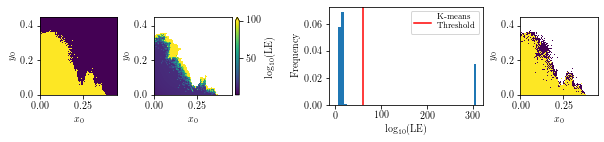

In [294]:
fig = plt.figure(figsize=(10, 1.8))
gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1.1, 0.2, 2, 1])
axs = [
    plt.subplot(gs[0]),
    plt.subplot(gs[1]),
    plt.subplot(gs[3]),
    plt.subplot(gs[4]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[0]
EXTENT = EXTENTS[0]

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

# plot the stability
data = f_stab["stability"][:]
mask = np.log10(data)==8

axs[0].imshow(mask.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", interpolation="none")

# plot the lyapunov
ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

cmap = axs[1].imshow(ground_truth_data.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmax=100)
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}($LE$)$", extend="max")
# cb.set_label(label="$\\log_{{10}}($FLI$)$ at $n_\\mathrm{max}=10^8$", fontsize="x-small")

gt_thesh = find_threshold(np.log10(ground_truth_data[mask]))

axs[2].hist((ground_truth_data[mask]), bins=50, density=True)
axs[2].axvline(10**gt_thesh, c="red", label="K-means\nThreshold")
axs[2].legend(fontsize="small")

ground_truth = np.log10(ground_truth_data) < gt_thesh

ground_truth_a = np.asarray(ground_truth, dtype=float)
ground_truth_a[~mask] = np.nan

axs[3].imshow(ground_truth_a.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", interpolation="none")
axs[3].set_xlabel("$x_0$")
axs[3].set_ylabel("$y_0$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")
axs[1].set_xlabel("$x_0$")
axs[1].set_ylabel("$y_0$")

axs[2].set_xlabel("$\\log_{{10}}($LE$)$")
axs[2].set_ylabel("Frequency")
plt.subplots_adjust(wspace=.45)

plt.savefig(os.path.join(FIGDIR, f"GT.{FORMAT}"), dpi=300, bbox_inches="tight")

# plt.tight_layout()